In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house_data = pd.read_csv("house-prices.csv")

In [3]:
house_data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [4]:
house_data.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [5]:
house_data.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le_brick = LabelEncoder()
le_neighborhood = LabelEncoder()

In [7]:
house_data['Brick'] = le_brick.fit_transform(house_data['Brick'].astype(str))
house_data['Neighborhood'] = le_neighborhood.fit_transform(house_data['Neighborhood'].astype(str))

In [8]:
X = house_data[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood']].values
y = house_data['Price'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

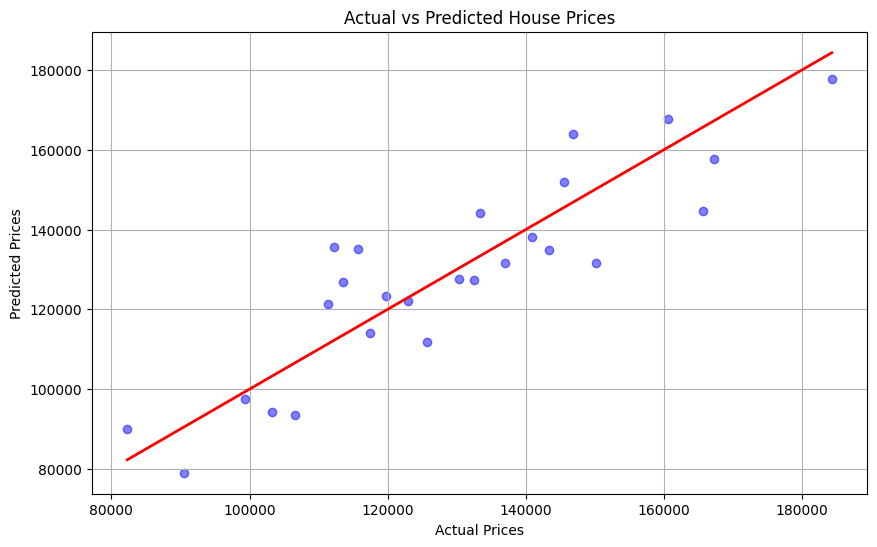

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

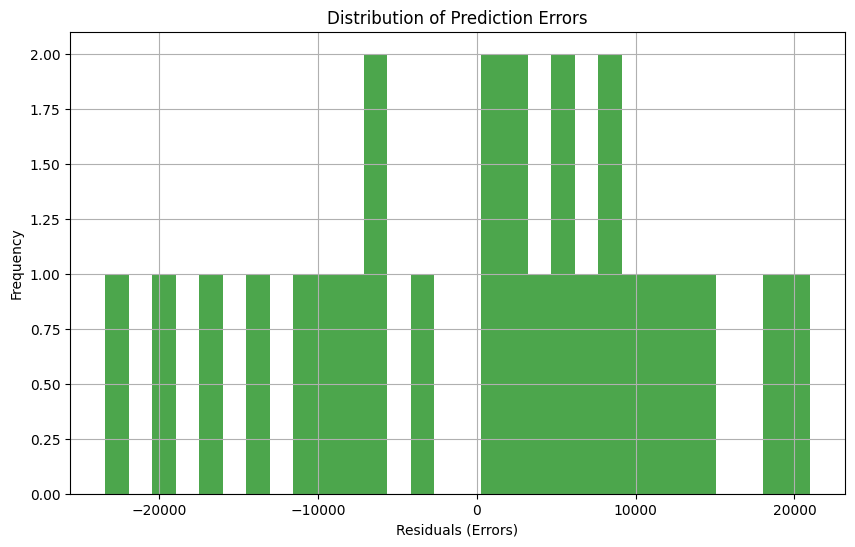

In [13]:
from sklearn.metrics import mean_squared_error
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.7)
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

In [14]:
example_input = np.array([[2000, 3, 2, 5, 1, 0]])

In [15]:
predicted_price = model.predict(example_input)
print(f'Predicted House Price: ${predicted_price[0]:,.2f}')

Predicted House Price: $103,737.65
